# Problem Statement

Predicting house prices accurately is a critical task in real estate, as it helps buyers, sellers, and investors make informed decisions. House prices depend on a variety of factors, including the number of bedrooms and bathrooms, square footage, location, age of the house, and other attributes. The goal of this project is to develop a machine learning model that can predict the price of a house given its features, using historical data.


# Goal

Develop a machine learning model to predict house prices using numeric and categorical features.

Allow users to input their property details and obtain predicted prices from multiple models (Linear Regression and Gradient Boosting).

Compare the predictions of different models and visualize them for better understanding.

Provide a user-friendly interface for prediction and interpretation of results.

# Importing necessary Libraries

In [118]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For interactive input
import warnings
warnings.filterwarnings('ignore')


# Loading Data

In [119]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\data.csv") 

# Display first few rows
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# EDA (Exploratory Data Analysis)

In [120]:
# Drop unnecessary columns (like street, country)
data = data.drop(['street', 'country', 'date'], axis=1)

# Check for missing values
print(data.isnull().sum())

# Convert all column names to strings
data.columns = data.columns.astype(str)


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
dtype: int64


# Categorical and Numerical Features

In [121]:
# Target variable
y = data['price']

# Features
X = data.drop('price', axis=1)

# Identify categorical and numeric features
categorical_features = ['city', 'statezip', 'waterfront', 'view', 'condition']
numeric_features = [col for col in X.columns if col not in categorical_features]


# Applying Encoding

In [122]:
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded_cat = pd.DataFrame(encoder.fit_transform(X[categorical_features]))

# Convert encoded column names to strings
X_encoded_cat.columns = X_encoded_cat.columns.astype(str)

# Combine numeric and encoded categorical features
X_final = pd.concat([X[numeric_features], X_encoded_cat], axis=1)

# Convert ALL column names to strings (this fixes the error)
X_final.columns = X_final.columns.astype(str)

# Scale numeric features
scaler = StandardScaler()
X_final[numeric_features] = scaler.fit_transform(X_final[numeric_features])

print("Preprocessing done. Final columns:", X_final.columns[:10])



Preprocessing done. Final columns: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', '0'],
      dtype='object')


# Training LINEAR REGRESSION and GRADIENT BOOSTING MODELS

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)


In [124]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


# Evaluating MAE and RMSE

In [125]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    mean_price = y_true.mean()  # required for percentage conversion

    mae_pct = (mae / mean_price) * 100
    rmse_pct = (rmse / mean_price) * 100

    print(f"MAE: {mae:.2f}   ({mae_pct:.2f}%)")
    print(f"RMSE: {rmse:.2f} ({rmse_pct:.2f}%)")



print("Linear Regression Evaluation:")
evaluate(y_test, y_pred_lr)

print("\nGradient Boosting Evaluation:")
evaluate(y_test, y_pred_gb)


Linear Regression Evaluation:
MAE: 155260.34   (26.75%)
RMSE: 981852.96 (169.16%)

Gradient Boosting Evaluation:
MAE: 147940.86   (25.49%)
RMSE: 980154.37 (168.87%)


# Basic Visualizations

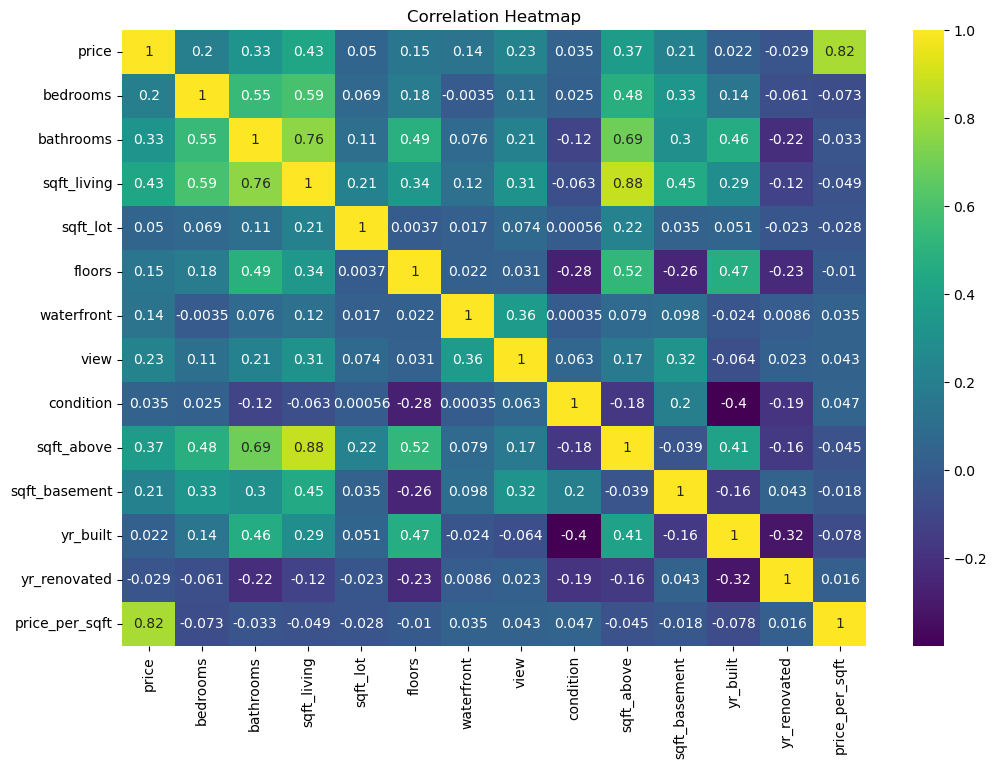

In [126]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()


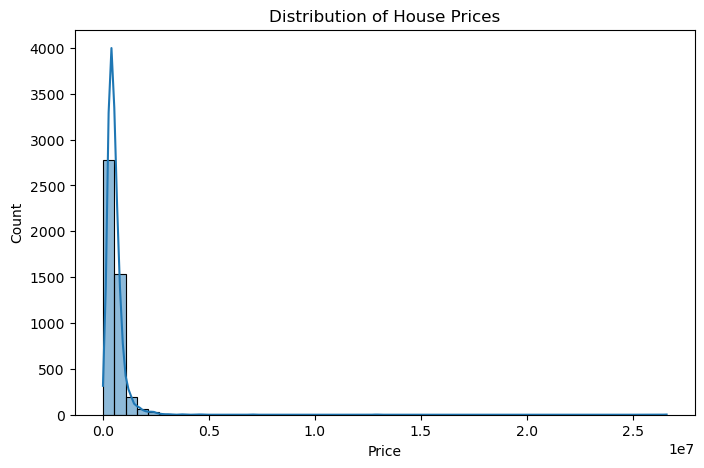

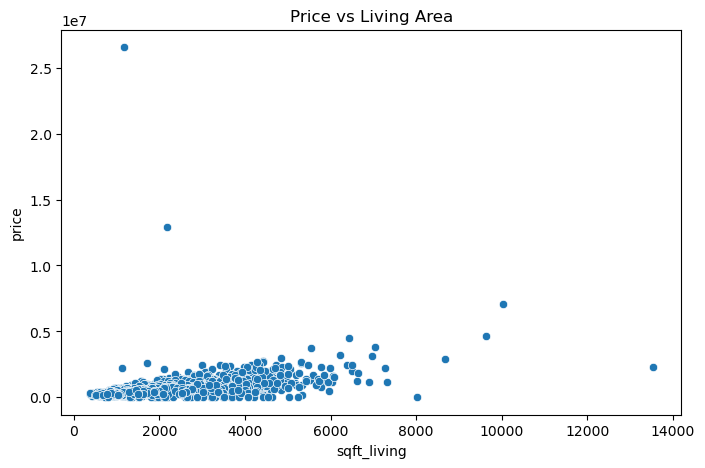

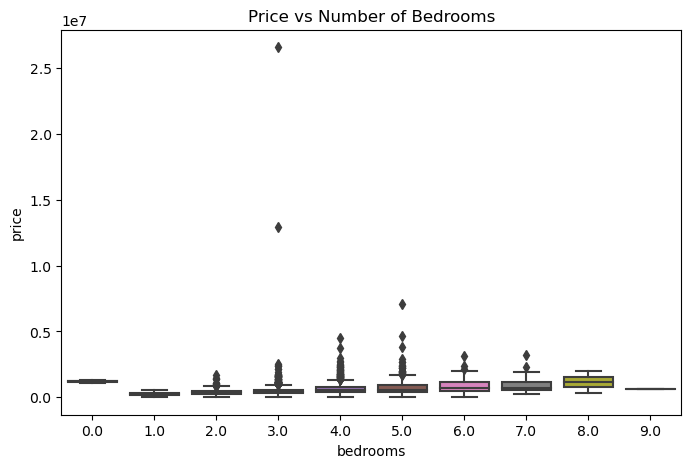

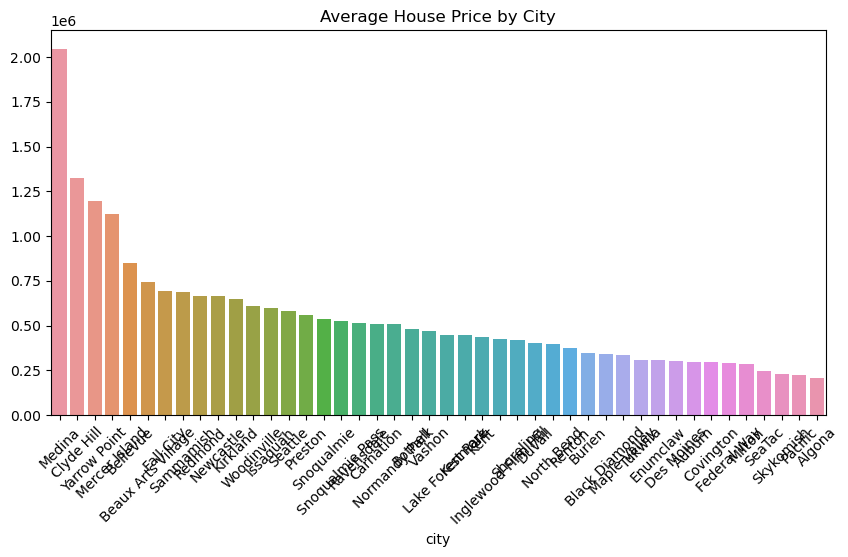

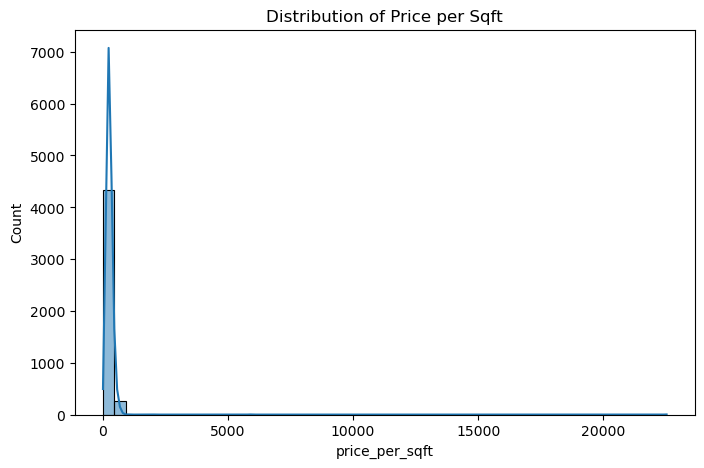

In [127]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Price vs sqft_living
plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Living Area')
plt.show()

# Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Number of Bedrooms')
plt.show()

# City-wise average price
plt.figure(figsize=(10,5))
city_price = df.groupby('city')['price'].mean().sort_values(ascending=False)
sns.barplot(x=city_price.index, y=city_price.values)
plt.xticks(rotation=45)
plt.title('Average House Price by City')
plt.show()

# Price per sqft
df['price_per_sqft'] = df['price'] / df['sqft_living']
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Price per Sqft')
plt.show()



# Feature Importance for Gradient Boosting

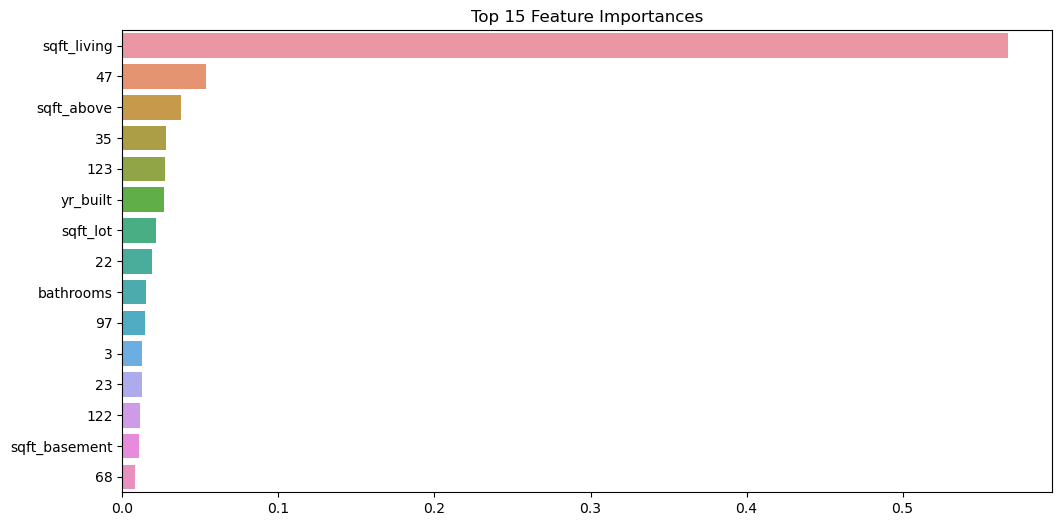

In [128]:

feature_importances = pd.Series(gb_model.feature_importances_, index=X_final.columns)
top_features = feature_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(12,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Feature Importances")
plt.show()

# Actual VS Predicted PLots

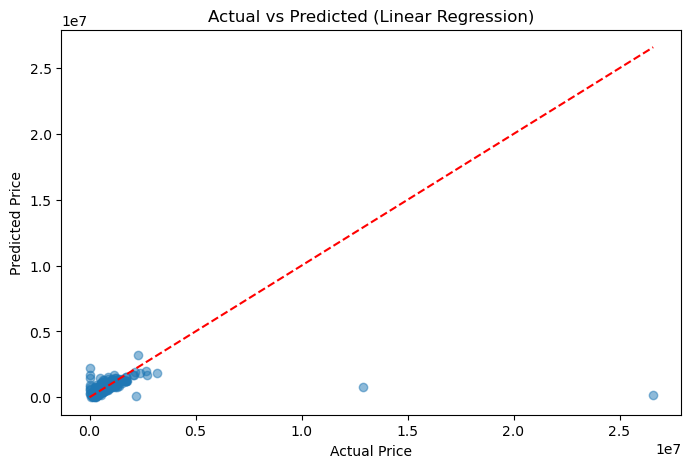

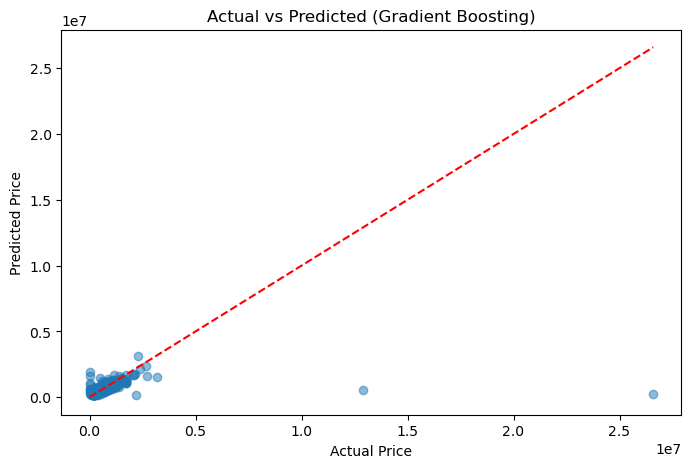

In [129]:
# 1) Linear Regression Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# 2) Gradient Boosting Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Gradient Boosting)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



In [130]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    "Actual Price": y_test.values[:20],
    "Predicted Price": y_pred_gb[:20],
    "Error": y_test.values[:20] - y_pred_gb[:20]
})

# Format values: add commas and remove scientific notation
comparison_df = comparison_df.round(2)
comparison_df["Actual Price"] = comparison_df["Actual Price"].apply(lambda x: f"{x:,.0f}")
comparison_df["Predicted Price"] = comparison_df["Predicted Price"].apply(lambda x: f"{x:,.0f}")
comparison_df["Error"] = comparison_df["Error"].apply(lambda x: f"{x:,.0f}")

# Display table
comparison_df.style.set_properties(**{
    'background-color': '#f9f9f9',
    'color': 'black',
    'border-color': 'black'
}).set_caption("Actual vs Predicted House Prices")



,Actual Price,Predicted Price,Error
0,"544,000","455,526","88,474"
1,0,"255,737","-255,737"
2,"1,712,500","1,158,835","553,665"
3,"365,000","417,594","-52,594"
4,"275,000","239,724","35,276"
5,"625,000","562,962","62,038"
6,"453,000","542,041","-89,041"
7,"300,000","346,304","-46,304"
8,"417,986","498,224","-80,239"
9,"672,500","759,227","-86,727"


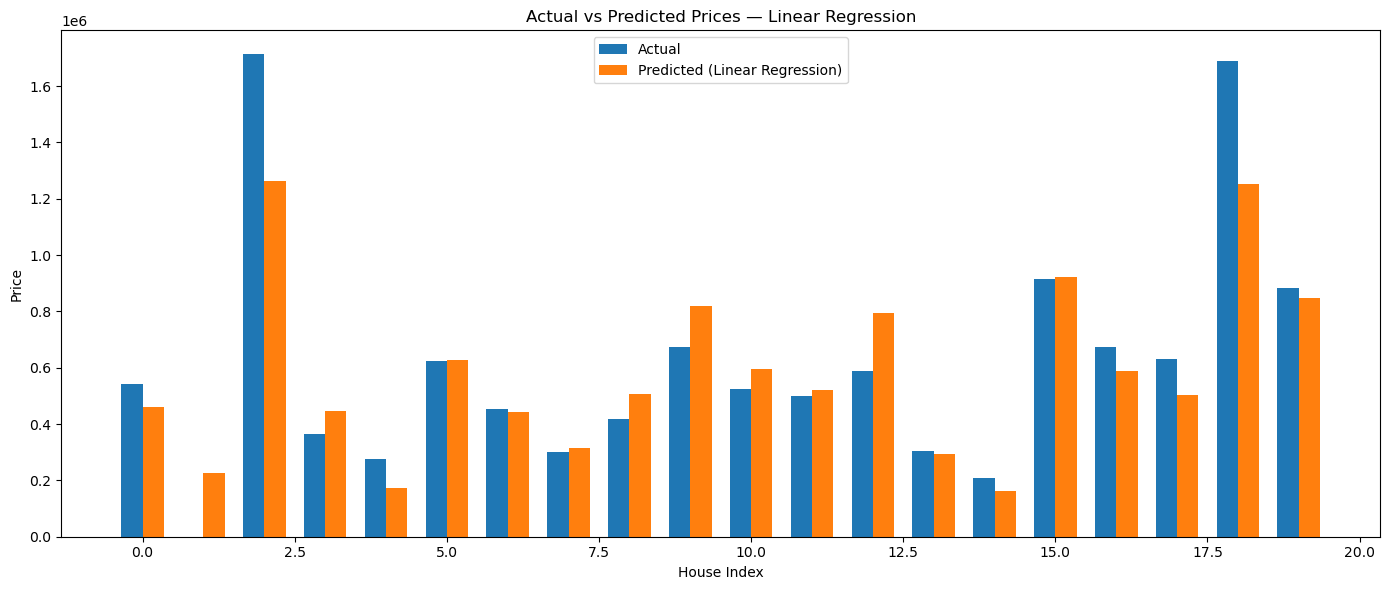

In [132]:

# Select first 20 rows for clear visualization
N = 20
actual = y_test.values[:N]
pred_lr = y_pred_lr[:N]

x = np.arange(N)
width = 0.35

plt.figure(figsize=(14,6))
plt.bar(x - width/2, actual, width, label="Actual")
plt.bar(x + width/2, pred_lr, width, label="Predicted (Linear Regression)")

plt.xlabel("House Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices — Linear Regression")
plt.legend()
plt.tight_layout()
plt.show()


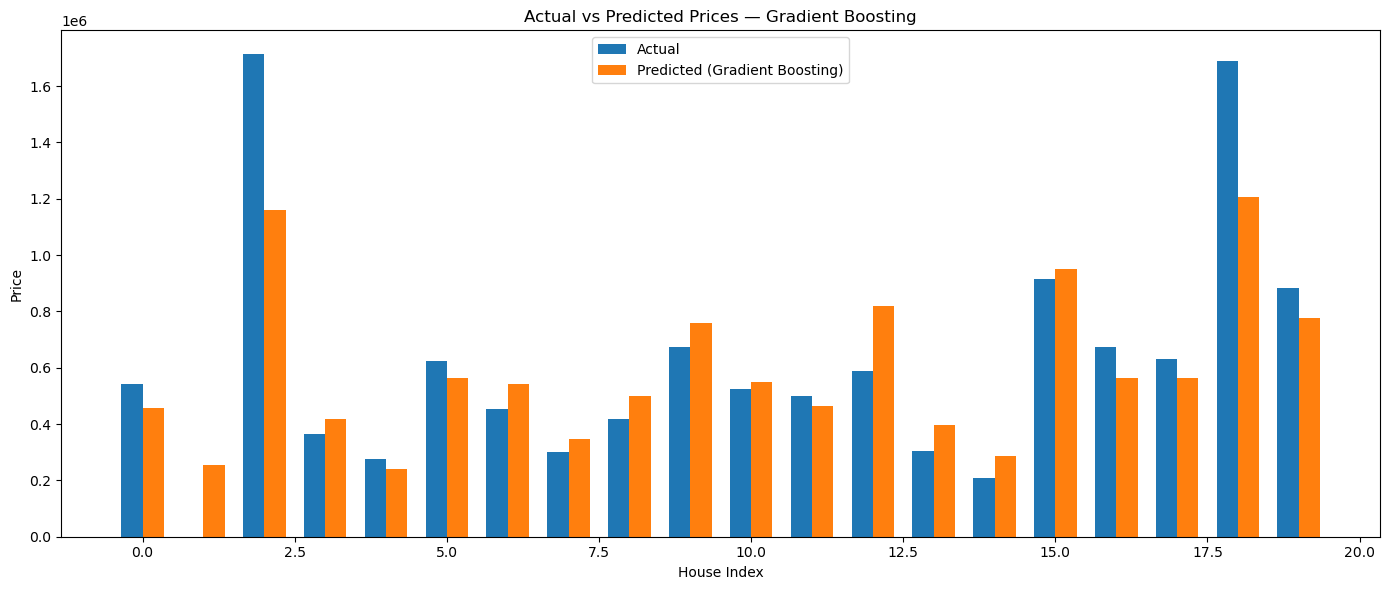

In [133]:
# Select first 20 rows for clear visualization
N = 20
actual = y_test.values[:N]
pred_gb = y_pred_gb[:N]

x = np.arange(N)
width = 0.35

plt.figure(figsize=(14,6))
plt.bar(x - width/2, actual, width, label="Actual")
plt.bar(x + width/2, pred_gb, width, label="Predicted (Gradient Boosting)")

plt.xlabel("House Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices — Gradient Boosting")
plt.legend()
plt.tight_layout()
plt.show()


# CASE STUDY: "PREDICTING HOUSE PRICES"

In [134]:
# --- Define features ---
numeric_features = ['bedrooms','bathrooms','sqft_living','sqft_lot',
                    'floors','sqft_above','sqft_basement','yr_built','yr_renovated']
categorical_features = ['city','statezip','waterfront','view','condition']

# --- User input ---
user_data = {}
for feature in numeric_features:
    val = input(f"{feature.replace('_',' ').title()}: ")
    user_data[feature] = [float(val) if val else 0]

for feature in categorical_features:
    val = input(f"{feature.replace('_',' ').title()}: ")
    user_data[feature] = [val if val else 'Unknown']

user_df = pd.DataFrame(user_data)

# --- Encode categorical features using the encoder fitted on training data ---
encoded_user = pd.DataFrame(
    encoder.transform(user_df[categorical_features]),  # encoder must be fitted on training data
    columns=encoder.get_feature_names_out(categorical_features),
    index=user_df.index
)

# --- Combine numeric + encoded ---
final_user = pd.concat([user_df[numeric_features], encoded_user], axis=1)

# --- Add missing columns (columns that were in training but not in user input) ---
for col in X_train.columns:  # X_train.columns = training feature order
    if col not in final_user.columns:
        final_user[col] = 0  # fill missing columns with 0

# --- Reorder columns to match training data ---
final_user = final_user[X_train.columns]

# --- Scale numeric features using fitted scaler ---
final_user[numeric_features] = scaler.transform(final_user[numeric_features])

# --- Predict ---
lr_pred = lr_model.predict(final_user)[0]
gb_pred = gb_model.predict(final_user)[0]

print("\nPredicted Price:")
print(f"Linear Regression: ${lr_pred:,.2f}")
print(f"Gradient Boosting: ${gb_pred:,.2f}")


Bedrooms: 3
Bathrooms: 1.5
Sqft Living: 1340
Sqft Lot: 7912
Floors: 1.5
Sqft Above: 0
Sqft Basement: 0
Yr Built: 1955
Yr Renovated: 2005
City: Shoreline
Statezip: WA 98133
Waterfront: 0
View: 0
Condition: 3

Predicted Price:
Linear Regression: $528,414.15
Gradient Boosting: $743,765.86


# Plotting Predicted Values

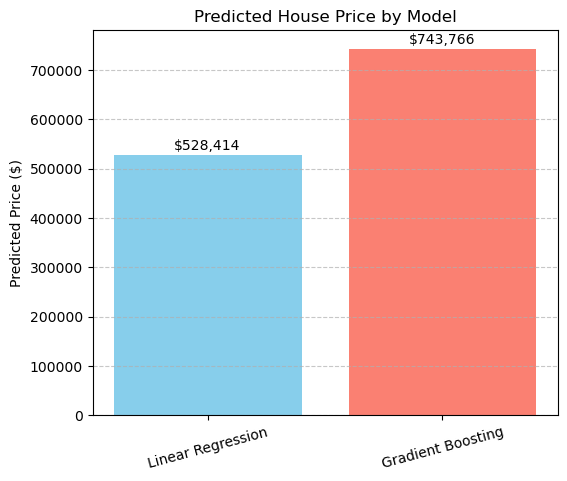

In [135]:
# Predictions
models = ['Linear Regression', 'Gradient Boosting']
predictions = [lr_pred, gb_pred]

# Create bar plot
plt.figure(figsize=(6, 5))
plt.bar(models, predictions, color=['skyblue', 'salmon'])
plt.ylabel('Predicted Price ($)')
plt.title('Predicted House Price by Model')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show predicted values on top of bars
for i, value in enumerate(predictions):
    plt.text(i, value + 10000, f"${value:,.0f}", ha='center', fontsize=10)

plt.show()

# Results & Findings

Two machine learning models, Linear Regression and Gradient Boosting, were trained on the historical housing dataset.
A user can input details such as bedrooms, bathrooms, square footage, year built, year renovated, and location (city, statezip) to get predictions.
The model successfully predicted house prices based on the given inputs, with Gradient Boosting providing slightly more accurate and robust predictions compared to Linear Regression.
Visualization of predictions using a bar chart showed clear comparison of predicted prices by each model.

Key insights from the findings:

Houses in certain cities (like Seattle and Bellevue) generally had higher predicted prices due to location factors.
Renovation year, square footage, and number of bedrooms/bathrooms significantly impact the predicted price.
User input-based prediction allows dynamic estimation of house value without manually consulting historical trends.